In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

plt.rcParams['figure.figsize'] = [18, 15]
plt.style.use('fivethirtyeight')

sns.set(rc={'figure.figsize':(18, 15)})
sns.set_theme(style="darkgrid")

In [3]:
df = pd.read_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\lemmatized.parquet")

In [4]:
def get_top_n_gram(corpus, n=None, ngram_range=(1,1)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [5]:
top_unigram = get_top_n_gram(df['text_without_stopwords_freq'], 50)

<AxesSubplot:title={'center':'Top 50 unigrams in Tweet before removing spams'}, xlabel='TweetText'>

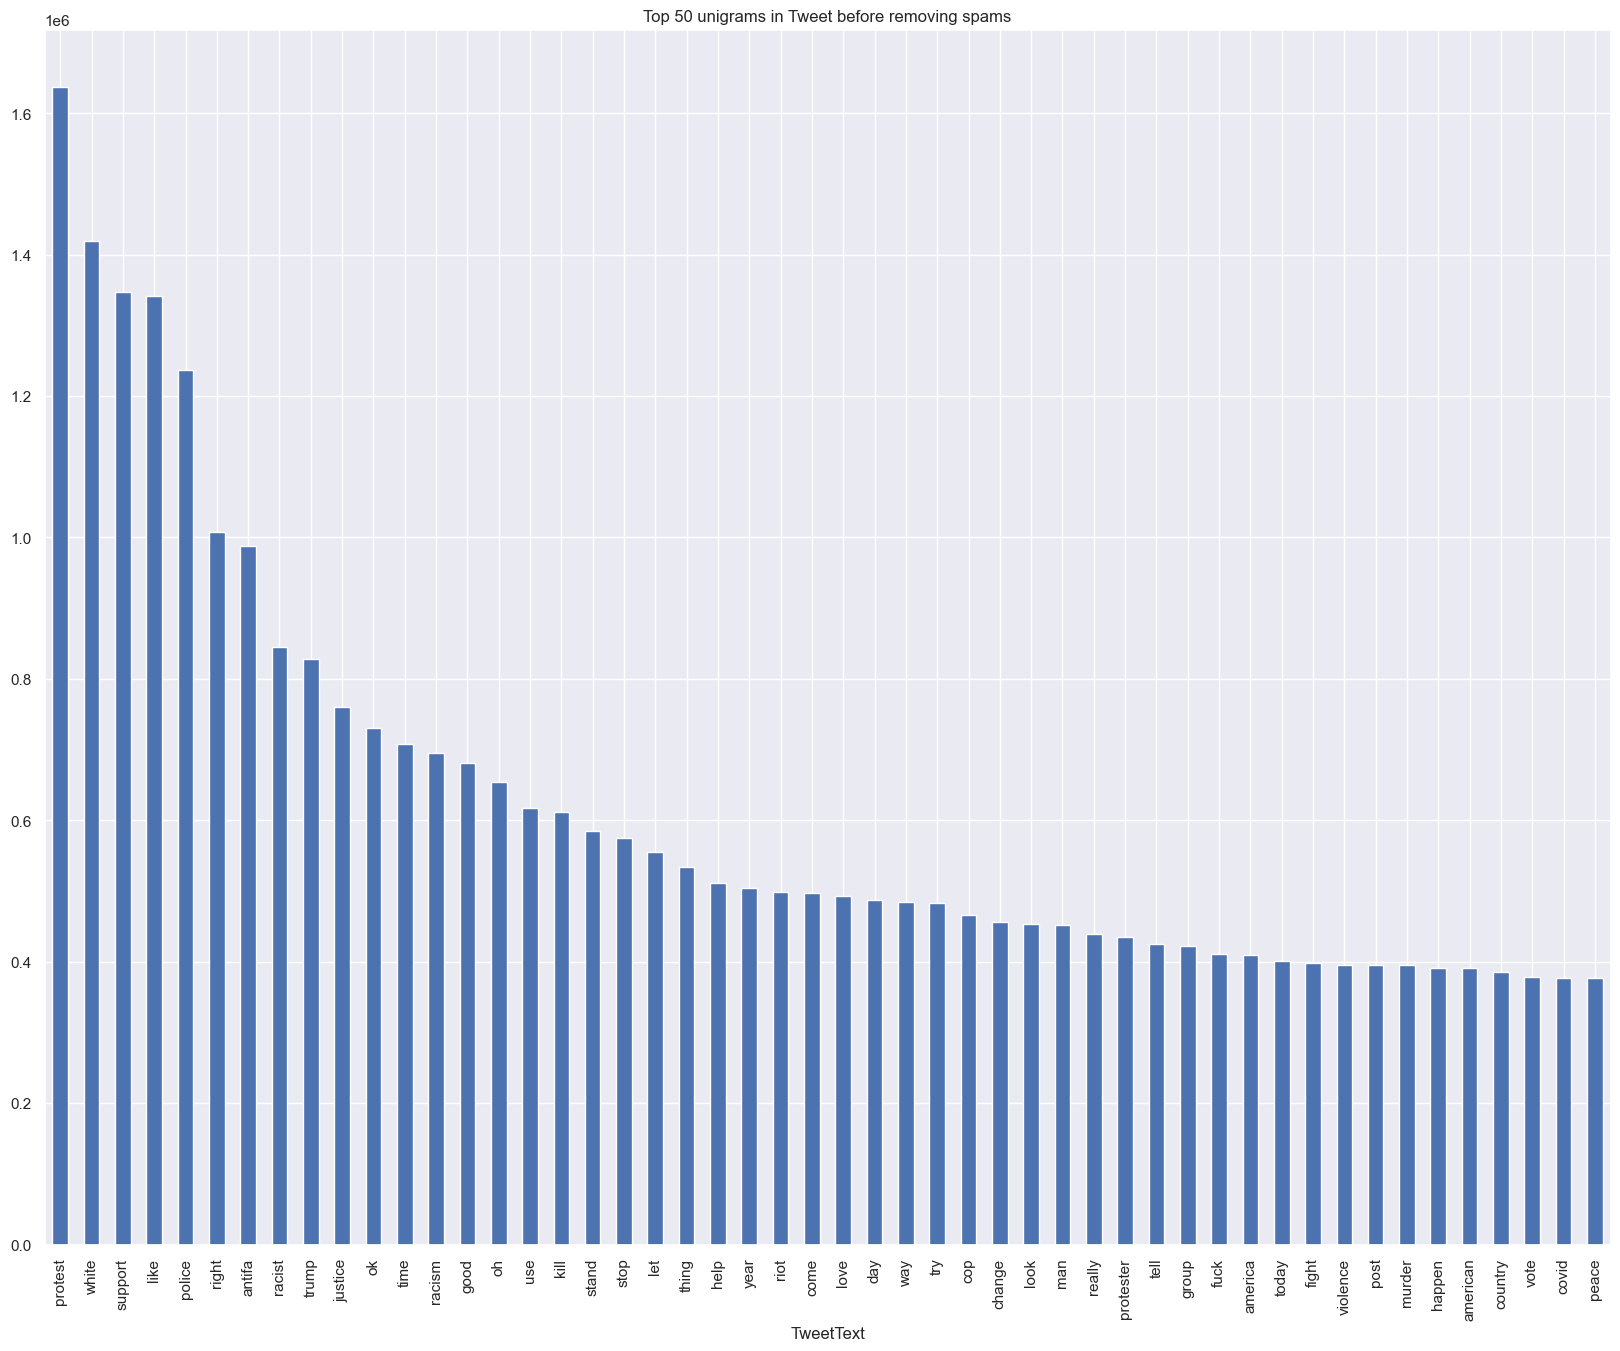

In [6]:
df1 = pd.DataFrame(top_unigram, columns = ['TweetText' , 'count'])
df1.groupby('TweetText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    title='Top 50 unigrams in Tweet before removing spams')

In [13]:
top_bigram = get_top_n_gram(df['text_without_stopwords_freq'], 50, ngram_range= (2,2))

<AxesSubplot:title={'center':'Top 50 bigrams in Tweet before removing spams'}, xlabel='TweetText'>

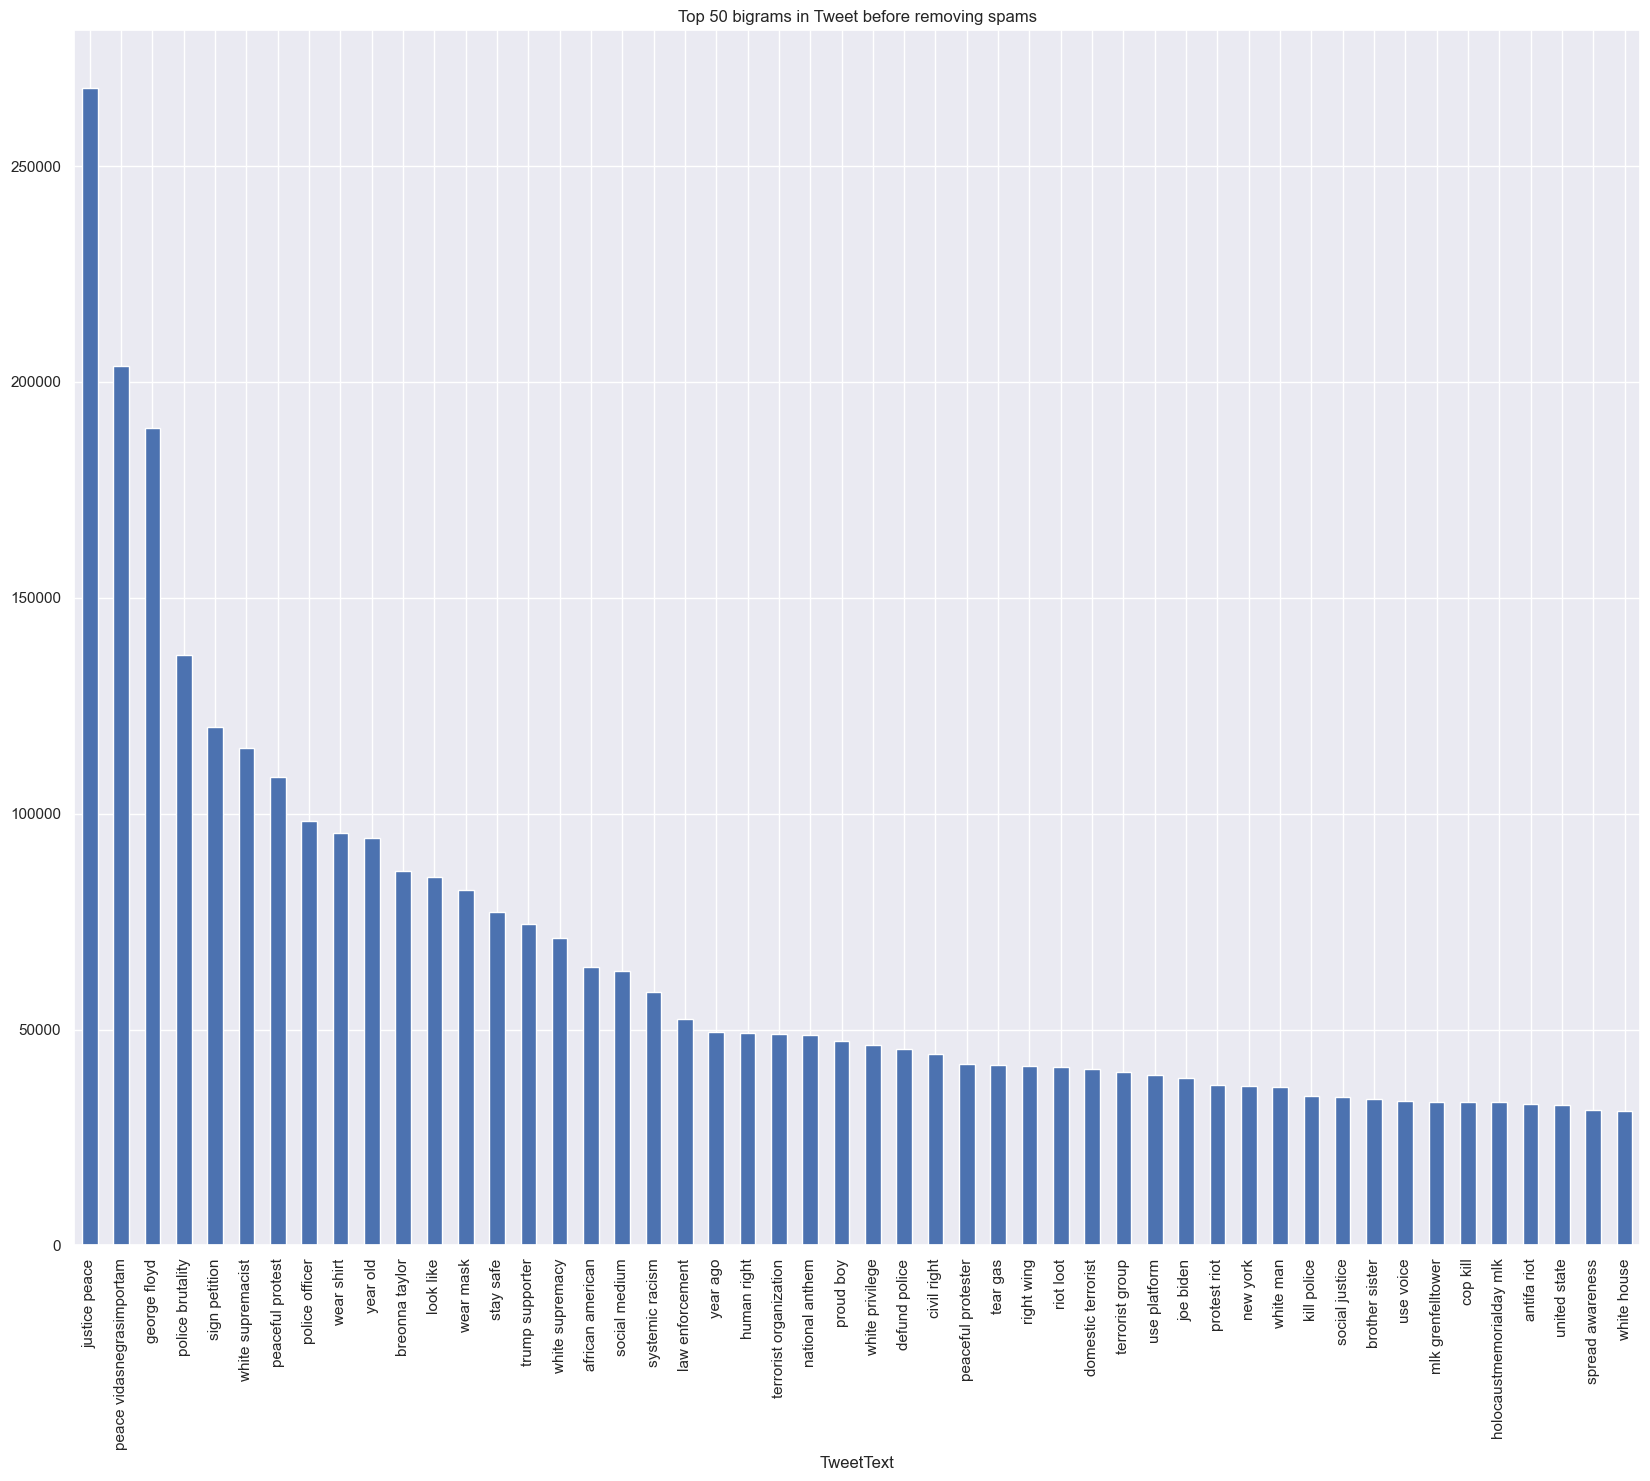

In [14]:
df1 = pd.DataFrame(top_bigram, columns = ['TweetText' , 'count'])
df1.groupby('TweetText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    title='Top 50 bigrams in Tweet before removing spams')

In [25]:
to_drop = ["ding ding", "retweet reply", "reply tag", "oh wait", "feel like", "oh yeah", "sound like", "act like", "fbr", "tweetuk", "gt gt gt", "asian vet lgbtq", "voteblue follow follow"]
df3 = df3[~df3['text'].str.contains('|'.join(to_drop))]

In [26]:
top_trigram = get_top_n_gram(df3['text_without_stopwords_freq'], 50, ngram_range= (3,3))

<AxesSubplot:title={'center':'Top 50 trigrams in Tweet before removing spams'}, xlabel='TweetText'>

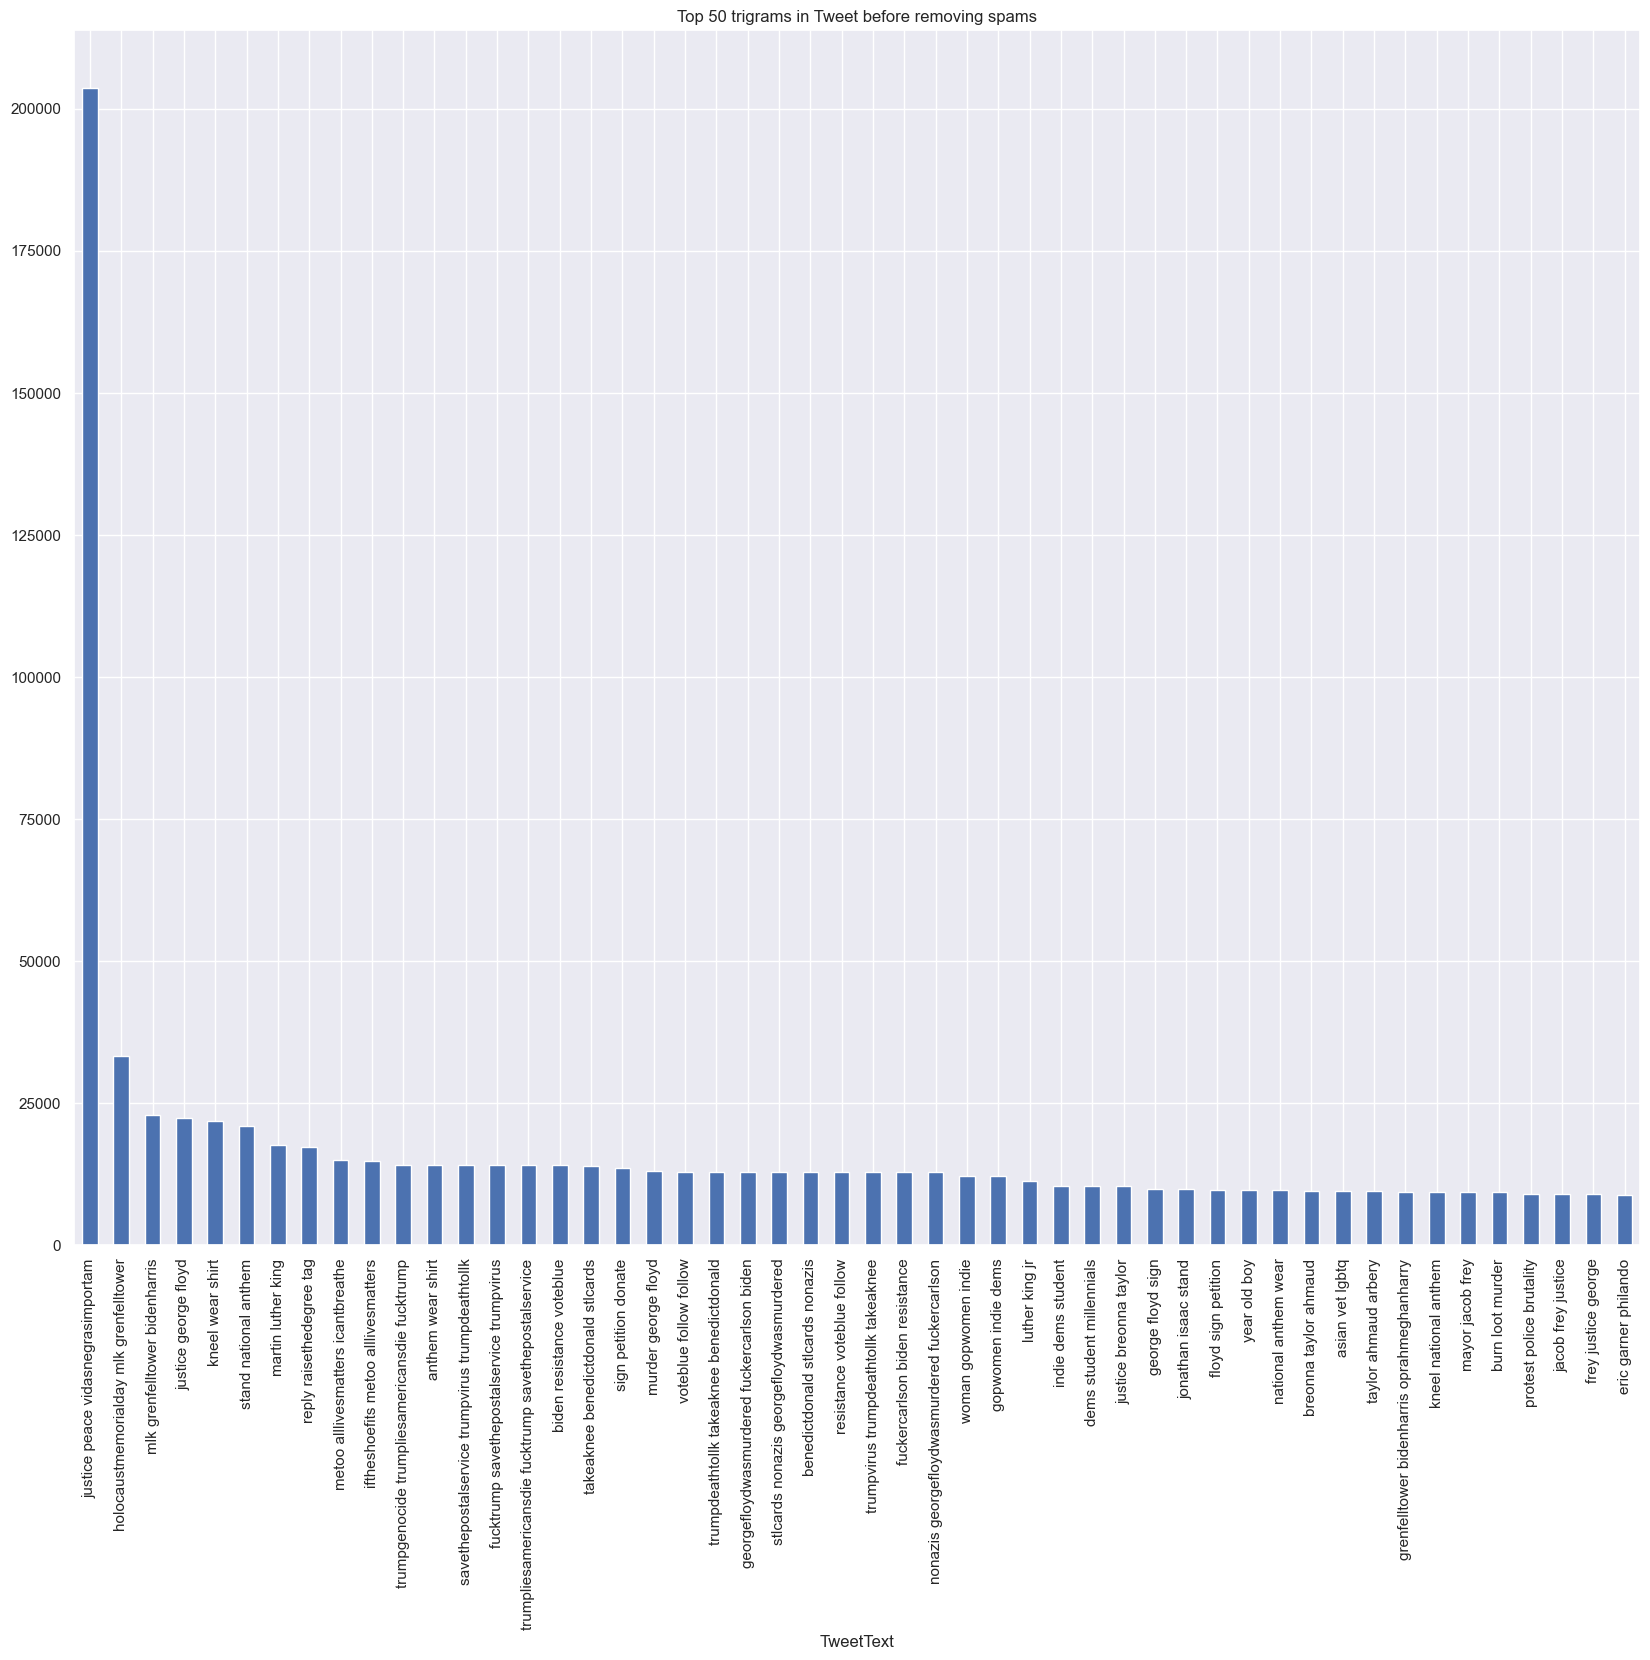

In [28]:
df1 = pd.DataFrame(top_trigram, columns = ['TweetText' , 'count'])
df1.groupby('TweetText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    title='Top 50 trigrams in Tweet before removing spams')

In [16]:
df2.to_parquet(r"C:\Users\fashaikh\Desktop\Thesis_main\filtered_ngram.parquet")

In [24]:
df3.drop_duplicates(subset=["cleanedContent", "category", "label", "emotion_label"])

,cleanedContent,label,emotion_label,category,text,text_without_stopwords,text_lemmatized,text_without_stopwords_freq
0,Everyday that the killers of #AhmaudArbery rem...,negative,fear,African American South,everyday that the killers of ahmaudarbery rema...,everyday killers ahmaudarbery remain free anot...,everyday killer ahmaudarbery remain free anoth...,everyday killer ahmaudarbery remain free anoth...
1,It took 59 days for the @user to arrest #Grego...,negative,disgust,African American South,it took days for the to arrest gregorymcmichae...,took days arrest gregorymcmichael travismcmich...,take day arrest gregorymcmichael travismcmicha...,day arrest gregorymcmichael travismcmichael mu...
6,TN is already starting. They say that #COVID19...,negative,anger,African American South,tn is already starting they say that covid is ...,tn already starting say covid good reason vote...,tn already start say covid good reason votebym...,tn already start covid good reason votebymail ...
7,5) I pledge that I will keep myself aware of w...,neutral,optimism,African American South,i pledge that i will keep myself aware of what...,pledge keep aware actions help actions hurt pl...,pledge keep aware action help action hurt pled...,pledge keep aware action help action hurt pled...
8,"@user Many may not know me, but I am a progres...",positive,optimism,African American South,many may not know me but i am a progressive ca...,many may know progressive candidate tn support...,many may know progressive candidate tn support...,many may progressive candidate tn support ubi ...
...,...,...,...,...,...,...,...,...
164840,@user Oh give your head a shake. Don’t forget ...,negative,anger,Working Class Country,oh give your head a shake dont forget it was b...,oh give head shake dont forget blm antifa star...,oh give head shake dont forget blm antifa star...,oh give head shake dont forget antifa start vi...
164841,@user Just a guy with a full face mask and an ...,neutral,disgust,Working Class Country,just a guy with a full face mask and an ar sta...,guy full face mask ar standing new blm mural d...,guy full face mask ar stand new blm mural down...,guy full face mask ar stand new mural downtown...
164842,@user Oh do go back and watch videos of those ...,neutral,anger,Working Class Country,oh do go back and watch videos of those in the...,oh go back watch videos democrat party see ver...,oh go back watch video democrat party see verb...,oh back watch video democrat party verbally ba...
164843,"@user Oh, that makes sense. Just vote for the ...",negative,anger,Working Class Country,oh that makes sense just vote for the one who ...,oh makes sense vote one emboldens antifa idiot...,oh make sense vote one embolden antifa idiot b...,oh sense vote embolden antifa idiot marxist bu...
